In [69]:
import pandas as pd
from google.colab import drive
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Verinin Yüklenmesi
* Bu python notebook'da CountVectorizer ile TfidfVectorizer kullanılarak Naive Bayes Classifier üzerinden binary sınıflandırma yapılarak sonuçlar incelenmiştir.


In [70]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
test_df = pd.read_csv("/content/gdrive/MyDrive/teknofest_preprocessed_test_df.csv", sep=",")
train_df = pd.read_csv("/content/gdrive/MyDrive/teknofest_preprocessed_train_df.csv", sep=",")
val_df = pd.read_csv("/content/gdrive/MyDrive/teknofest_preprocessed_val_df.csv", sep=",")

In [72]:
all_data = pd.concat([test_df, train_df, val_df], axis=0, ignore_index=True)

In [73]:
all_data.head()

,id,text,is_offensive,target
0,ce129457-8bef-4c2c-89fc-56c2be682c17,anasını satayım böyle,1,SEXIST
1,279123c7-7592-4857-bfe0-fcb3b73d709e,sanığın haklarını korumak,0,OTHER
2,68899d1e-33d8-4392-a988-f68f3da07d19,kadınlar para harcar,1,SEXIST
3,5bc81173-5544-452b-a019-476a5f4f27b6,kadının tek işi evidir,1,SEXIST
4,c82e0cb1-fb3c-4e04-932c-895d6a2bfec7,kadının tek görevi erkeklerin ihtiyacını gider...,1,SEXIST


<Axes: xlabel='is_offensive', ylabel='count'>

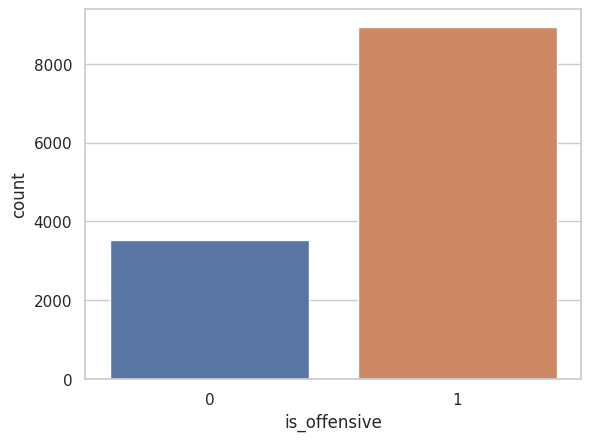

In [74]:
sns.countplot(x=all_data["is_offensive"])
# Offensive ve offensive olmayanlar arasındaki dağılım

In [75]:
print(f"Test Dataframe Shape: {test_df.shape} \nTrain Dataframe Shape: {train_df.shape} \nValidation Dataframe Shape: {val_df.shape}")

Test Dataframe Shape: (748, 4) 
Train Dataframe Shape: (9968, 4) 
Validation Dataframe Shape: (1745, 4)


In [76]:
test_df.head()

,id,text,is_offensive,target
0,ce129457-8bef-4c2c-89fc-56c2be682c17,anasını satayım böyle,1,SEXIST
1,279123c7-7592-4857-bfe0-fcb3b73d709e,sanığın haklarını korumak,0,OTHER
2,68899d1e-33d8-4392-a988-f68f3da07d19,kadınlar para harcar,1,SEXIST
3,5bc81173-5544-452b-a019-476a5f4f27b6,kadının tek işi evidir,1,SEXIST
4,c82e0cb1-fb3c-4e04-932c-895d6a2bfec7,kadının tek görevi erkeklerin ihtiyacını gider...,1,SEXIST


In [77]:
train_df.head()

,id,text,is_offensive,target
0,158efe55-dd14-42fe-8080-d82c89d4b1d8,kahve içtim yüzden uykusuzum,1,OTHER
1,112fee13-5d19-420e-b268-cb66064d803d,kürt zihniyeti,1,RACIST
2,d389656b-54f6-4db4-83ba-0bbe06cfde0f,parfüm kokundan burnumun direği sızladı,1,INSULT
3,7486fef9-83b8-4bbb-8541-561b5497c6cc,gavurlar yaptıysa doğrudur,1,RACIST
4,63bf4346-c53c-4c56-b7b0-471436860011,30 yaşını geçmiş kadın saaten sonra zor evlenir,1,SEXIST


In [78]:
X_train = train_df.iloc[:,1]
Y_train = train_df.iloc[:,2]
X_test = test_df.iloc[:,1]
Y_test = test_df.iloc[:,2]
X_val = val_df.iloc[:,1]
Y_val = val_df.iloc[:,2]

In [79]:
print(f"X_train shape: {X_train.shape}\nY_train shape: {Y_train.shape}\nX_test shape: {X_test.shape}\nY_test shape: {Y_test.shape}\nX_val shape: {X_val.shape}\nY_val shape: {Y_val.shape}\n")

X_train shape: (9968,)
Y_train shape: (9968,)
X_test shape: (748,)
Y_test shape: (748,)
X_val shape: (1745,)
Y_val shape: (1745,)



## TfidfVectorizer Ve CountVectorizer Arasındaki Fark Nedir?
CountVectorizer, bir kelimenin bir belgede kaç kez göründüğünü sayar (bag of word yaklaşımı kullanarak), TF-IDF Vectorizer ise bir kelimenin yalnızca bir belgede kaç kez geçtiğini değil, aynı zamanda o kelimenin ne kadar önemli olduğunu da hesaba katar.

# CountVectorizer + Navie Bayes Sonuçları

In [80]:
count_vectorizer = CountVectorizer()
X_train_tf = count_vectorizer.fit_transform(X_train)

In [81]:
X_train_tf.shape
# 20978 adet feature mevcut

(9968, 20978)

In [82]:
X_test_tf = count_vectorizer.transform(X_test)

In [83]:
X_val_tf = count_vectorizer.transform(X_val)

In [84]:
X_test_tf.shape

(748, 20978)

In [85]:
X_val_tf.shape

(1745, 20978)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, Y_train)

In [87]:
y_pred = naive_bayes_classifier.predict(X_test_tf)
y_val_pred = naive_bayes_classifier.predict(X_val_tf)
train_pred = naive_bayes_classifier.predict(X_train_tf)

### CountVectorizer + Navie Bayes Train Sonuçları

In [88]:
print("TRAIN DATA")
score2 = metrics.accuracy_score(Y_train, train_pred)
print("accuracy:   %0.3f" % score2)

print(metrics.classification_report(Y_train, train_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_train, train_pred))

TRAIN DATA
accuracy:   0.972
              precision    recall  f1-score   support

    Positive       0.99      0.92      0.95      2817
    Negative       0.97      0.99      0.98      7151

    accuracy                           0.97      9968
   macro avg       0.98      0.96      0.97      9968
weighted avg       0.97      0.97      0.97      9968

confusion matrix:
[[2579  238]
 [  37 7114]]


### CountVectorizer + Navie Bayes Validation Sonuçları

In [89]:
print("VALIDATION DATA")
score2 = metrics.accuracy_score(Y_val, y_val_pred)
print("accuracy:   %0.3f" % score2)

print(metrics.classification_report(Y_val, y_val_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_val, y_val_pred))

VALIDATION DATA
accuracy:   0.886
              precision    recall  f1-score   support

    Positive       0.89      0.68      0.77       493
    Negative       0.88      0.97      0.92      1252

    accuracy                           0.89      1745
   macro avg       0.89      0.82      0.85      1745
weighted avg       0.89      0.89      0.88      1745

confusion matrix:
[[ 335  158]
 [  41 1211]]


### CountVectorizer + Navie Bayes Test Sonuçları

In [90]:
print("TEST DATA")
score1 = metrics.accuracy_score(Y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(Y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_test, y_pred))

TEST DATA
accuracy:   0.893
              precision    recall  f1-score   support

    Positive       0.92      0.68      0.78       212
    Negative       0.89      0.98      0.93       536

    accuracy                           0.89       748
   macro avg       0.90      0.83      0.86       748
weighted avg       0.90      0.89      0.89       748

confusion matrix:
[[144  68]
 [ 12 524]]


# TfidfVectorizer + Navie Bayes Sonuçları

In [91]:
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)

In [92]:
X_train_tf.shape

(9968, 20978)

In [93]:
X_test_tf = tf_vectorizer.transform(X_test)

In [94]:
X_val_tf = tf_vectorizer.transform(X_val)

In [95]:
X_test_tf.shape

(748, 20978)

In [96]:
X_val_tf.shape

(1745, 20978)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, Y_train)

In [98]:
y_pred = naive_bayes_classifier.predict(X_test_tf)
y_val_pred = naive_bayes_classifier.predict(X_val_tf)
train_pred = naive_bayes_classifier.predict(X_train_tf)

### TfidfVectorizer + Navie Bayes Train Sonuçları

In [99]:
print("TRAIN DATA")
score2 = metrics.accuracy_score(Y_train, train_pred)
print("accuracy:   %0.3f" % score2)

print(metrics.classification_report(Y_train, train_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_train, train_pred))

TRAIN DATA
accuracy:   0.930
              precision    recall  f1-score   support

    Positive       1.00      0.75      0.86      2817
    Negative       0.91      1.00      0.95      7151

    accuracy                           0.93      9968
   macro avg       0.96      0.88      0.91      9968
weighted avg       0.94      0.93      0.93      9968

confusion matrix:
[[2123  694]
 [   3 7148]]


### TfidfVectorizer + Navie Bayes Validation Sonuçları

In [100]:
print("VALIDATION DATA")
score2 = metrics.accuracy_score(Y_val, y_val_pred)
print("accuracy:   %0.3f" % score2)

print(metrics.classification_report(Y_val, y_val_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_val, y_val_pred))

VALIDATION DATA
accuracy:   0.834
              precision    recall  f1-score   support

    Positive       0.96      0.43      0.59       493
    Negative       0.82      0.99      0.90      1252

    accuracy                           0.83      1745
   macro avg       0.89      0.71      0.74      1745
weighted avg       0.86      0.83      0.81      1745

confusion matrix:
[[ 212  281]
 [   9 1243]]


### TfidfVectorizer + Navie Bayes Test Sonuçları

In [101]:
print("TEST DATA")
score1 = metrics.accuracy_score(Y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(Y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_test, y_pred))

TEST DATA
accuracy:   0.828
              precision    recall  f1-score   support

    Positive       0.98      0.40      0.57       212
    Negative       0.81      1.00      0.89       536

    accuracy                           0.83       748
   macro avg       0.89      0.70      0.73       748
weighted avg       0.86      0.83      0.80       748

confusion matrix:
[[ 85 127]
 [  2 534]]
